# Velocità media di ogni pilota durante il gp

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from collections import OrderedDict

ff1.Cache.enable_cache('2023Australia') 
fp = ff1.get_session(2023, 'Australia', 'R')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()


In [12]:


drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

#creo un dizionario con le velocità medie
mean_speed_dict = dict.fromkeys(drivers)
for driver in drivers:
    if not driver == "LEC":
        mean_speed = np.mean(fp_laps.pick_driver(driver).get_car_data()["Speed"]) #mean speed
        #mean_speed = sum(fp_laps.pick_driver(driver).pick_fastest().get_car_data()["Speed"]) / len(fp_laps.pick_driver(driver).pick_fastest().get_car_data()["Speed"])
        mean_speed_dict[driver] = float("{:.1f}".format(mean_speed))#(mean_speed)

best_laps = list()
for driver in drivers:
        if not driver == "LEC":
            best_laps.append(fp.laps.pick_driver(driver).pick_fastest())
fastest_laps = Laps(best_laps).sort_values(by='LapTime').reset_index(drop=True)

team_colors = list()
team_color_drvrs = list()
for index, lap in fastest_laps.iterlaps():
        team_color_drvrs.append(lap['Driver'])
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)

mean_speed_dict_ordered = OrderedDict((k, mean_speed_dict[k]) for k in team_color_drvrs)
mean_speed_dict_ordered = dict(mean_speed_dict_ordered)

    

{'PER': 177.0, 'VER': 177.3, 'SAI': 177.3, 'ALO': 176.3, 'HAM': 177.2, 'STR': 176.2, 'GAS': 177.2, 'HUL': 177.0, 'NOR': 176.7, 'DEV': 173.2, 'OCO': 176.7, 'PIA': 175.8, 'SAR': 173.1, 'MAG': 174.9, 'TSU': 174.4, 'ZHO': 175.0, 'BOT': 174.8, 'RUS': 102.9, 'ALB': 226.8}


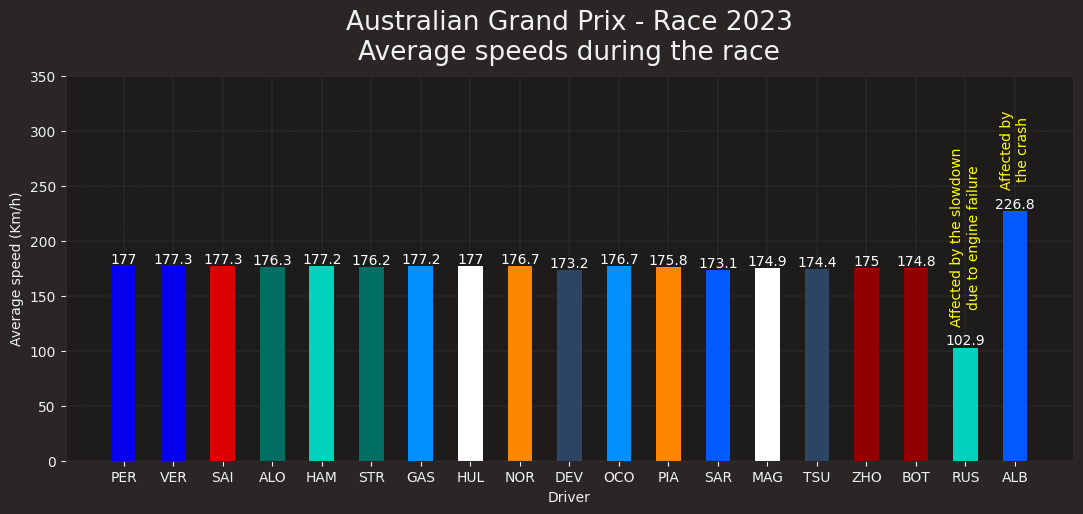

In [47]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(13, 5))
plt.bar_label(plt.bar(list(mean_speed_dict_ordered.keys()), list(mean_speed_dict_ordered.values()), color = team_colors, width=0.5), fontsize = 10, color = 'white')
plt.title(f"{fp.event.EventName} - {fp.name} {fp.event.year}\nAverage speeds during the race")
plt.annotate("Affected by the slowdown\ndue to engine failure", xy=("RUS", 125), rotation=90, ha='center', color='yellow')
plt.annotate("Affected by\nthe crash", xy=("ALB", 250), rotation=90, ha='center', color='yellow')
plt.xlabel("Driver")
ax = plt.gca()
plt.ylabel("Average speed (Km/h)")
plt.yticks(range(0, 400, 50))
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.3)

